In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy import interpolate
from scipy import optimize

In [3]:
data = pd.read_csv("1.csv")

In [4]:
mask = data['I[A]'] > 11
MNK = sts.linregress(data['I[A]'][mask], data['P[Wt]'][mask])
x = np.linspace(0, 15, 1000)
y = MNK.slope * x + MNK.intercept
print("Наклон: ",MNK.slope)

Наклон:  0.4855983772819473


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_74797/919326778.py:6: SyntaxWarning: invalid escape sequence '\p'
  label = f'Наилучшая прямая a = {MNK.slope:.2f} $\pm$ {MNK.stderr:.2f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')
/tmp/ipykernel_74797/919326778.py:6: SyntaxWarning: invalid escape sequence '\p'
  label = f'Наилучшая прямая a = {MNK.slope:.2f} $\pm$ {MNK.stderr:.2f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')


Text(0, 0.5, 'Мощность [Вт]')

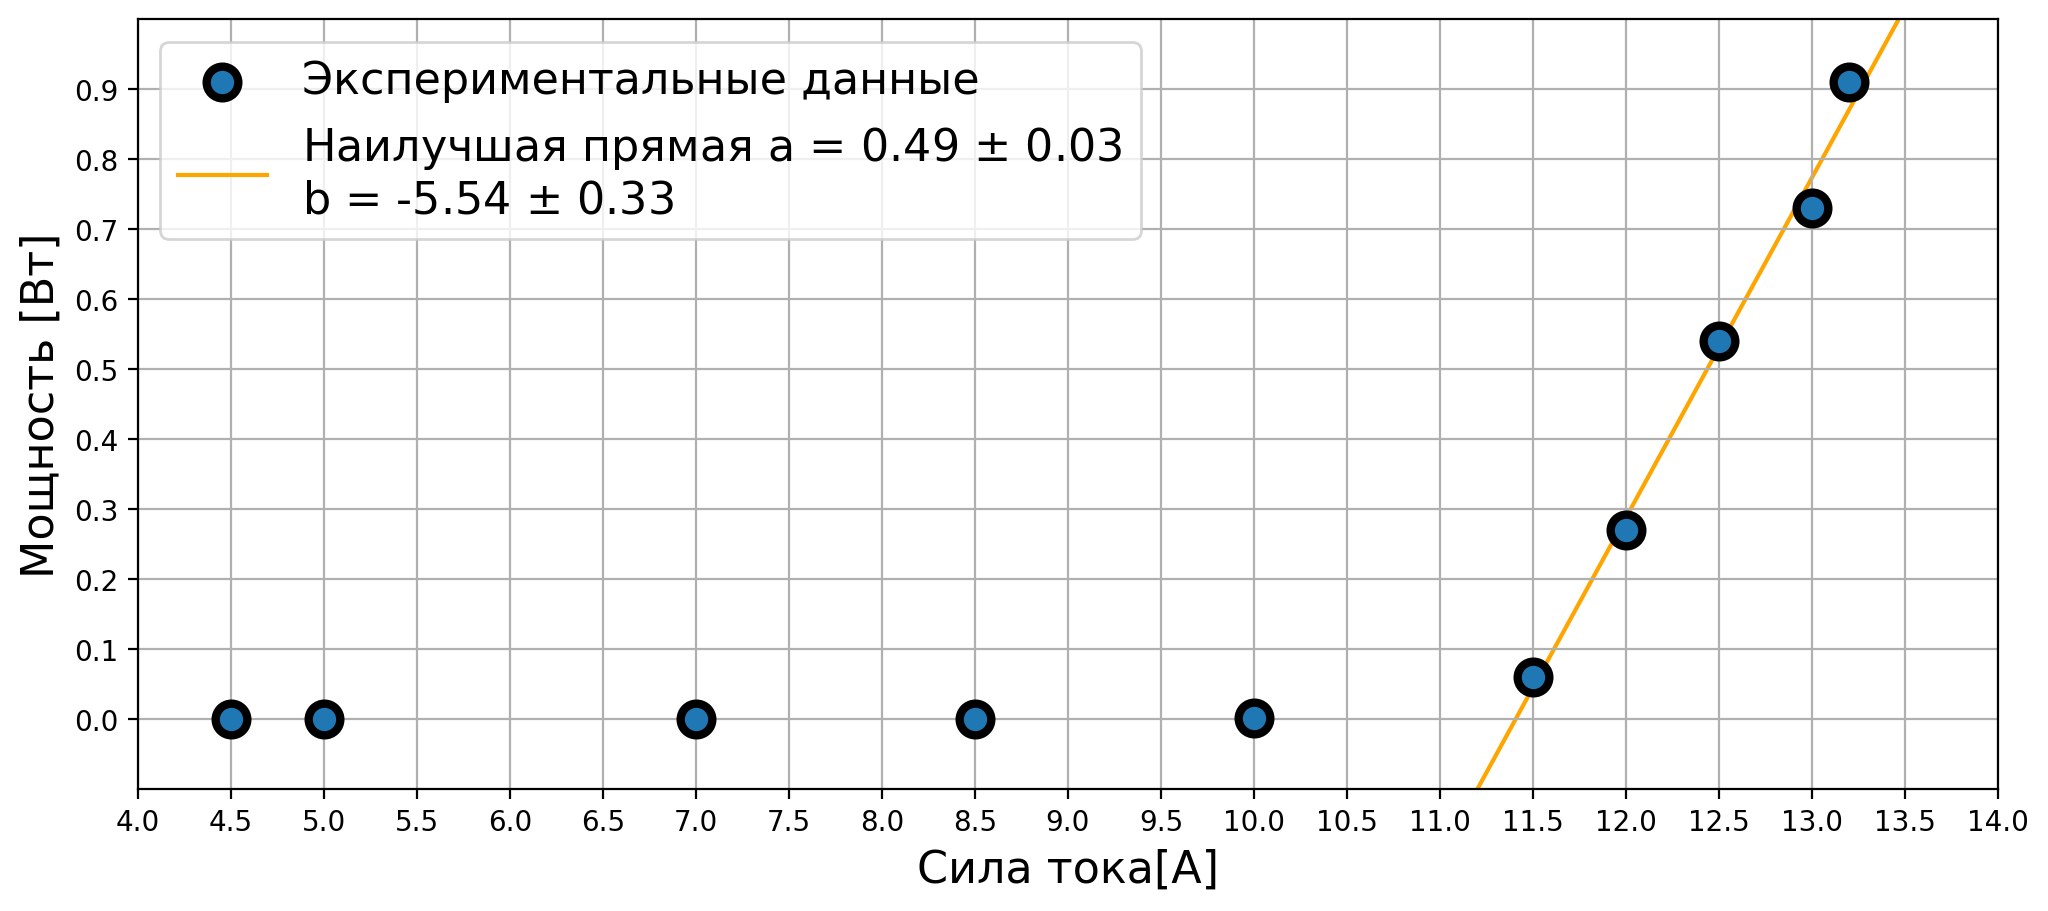

In [5]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(data["I[A]"], data['P[Wt]'], s = 130, edgecolors='black', linewidths=3, zorder = 9, label = 'Экспериментальные данные')
plt.plot(x, y, 
         color = 'orange', 
         zorder = 1,
         label = f'Наилучшая прямая a = {MNK.slope:.2f} $\pm$ {MNK.stderr:.2f}\nb = {MNK.intercept:.2f} $\pm$ {MNK.intercept_stderr:.2f}')
plt.xticks(np.arange(0, 15, 0.5))
plt.yticks(np.arange(0, 1, 0.1))
plt.xlim(4, 14)
plt.ylim(-0.1, 1)
plt.legend(fontsize = 16)
plt.grid()
plt.xlabel("Сила тока[А]", fontsize = 16)
plt.ylabel("Мощность [Вт]", fontsize = 16)

In [6]:
print(f"КПД: {MNK.slope * 1e2 / 12} %")

КПД: 4.046653144016227 %


### Пик

<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_74797/318700591.py:15: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\propto$ J [отн. ед.]", fontsize = 16)


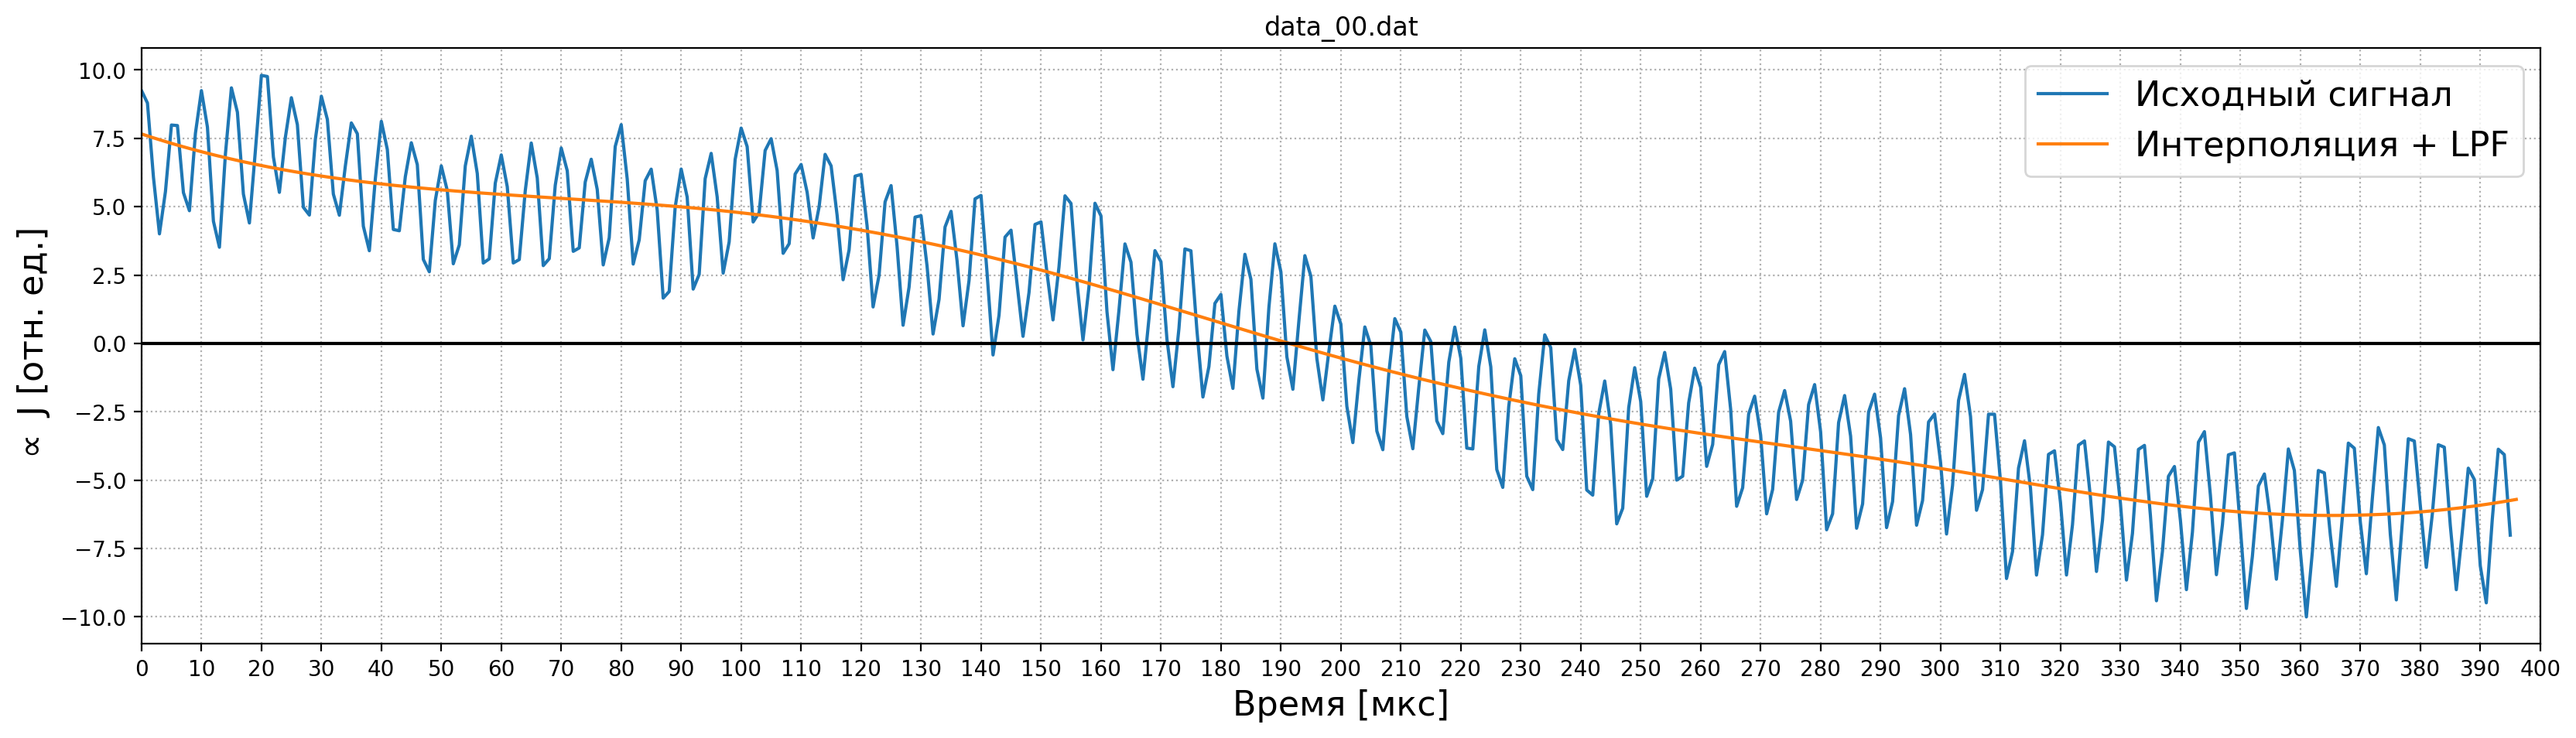

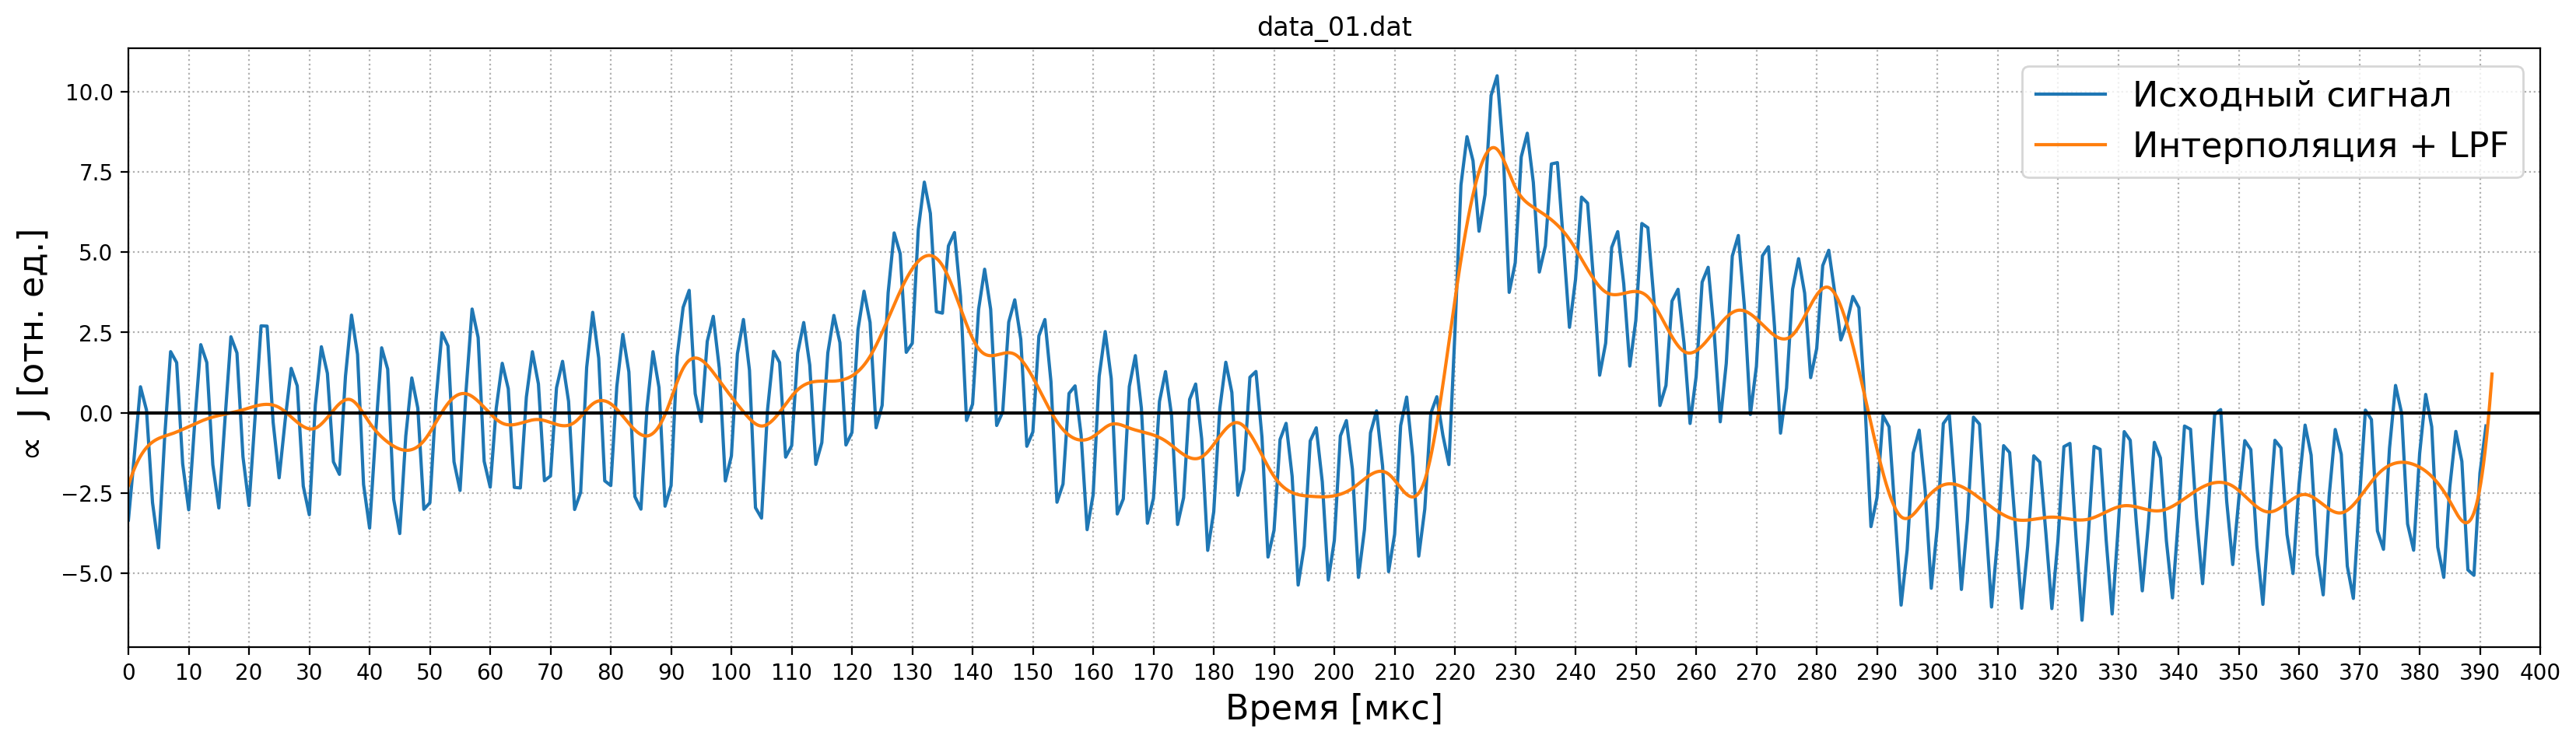

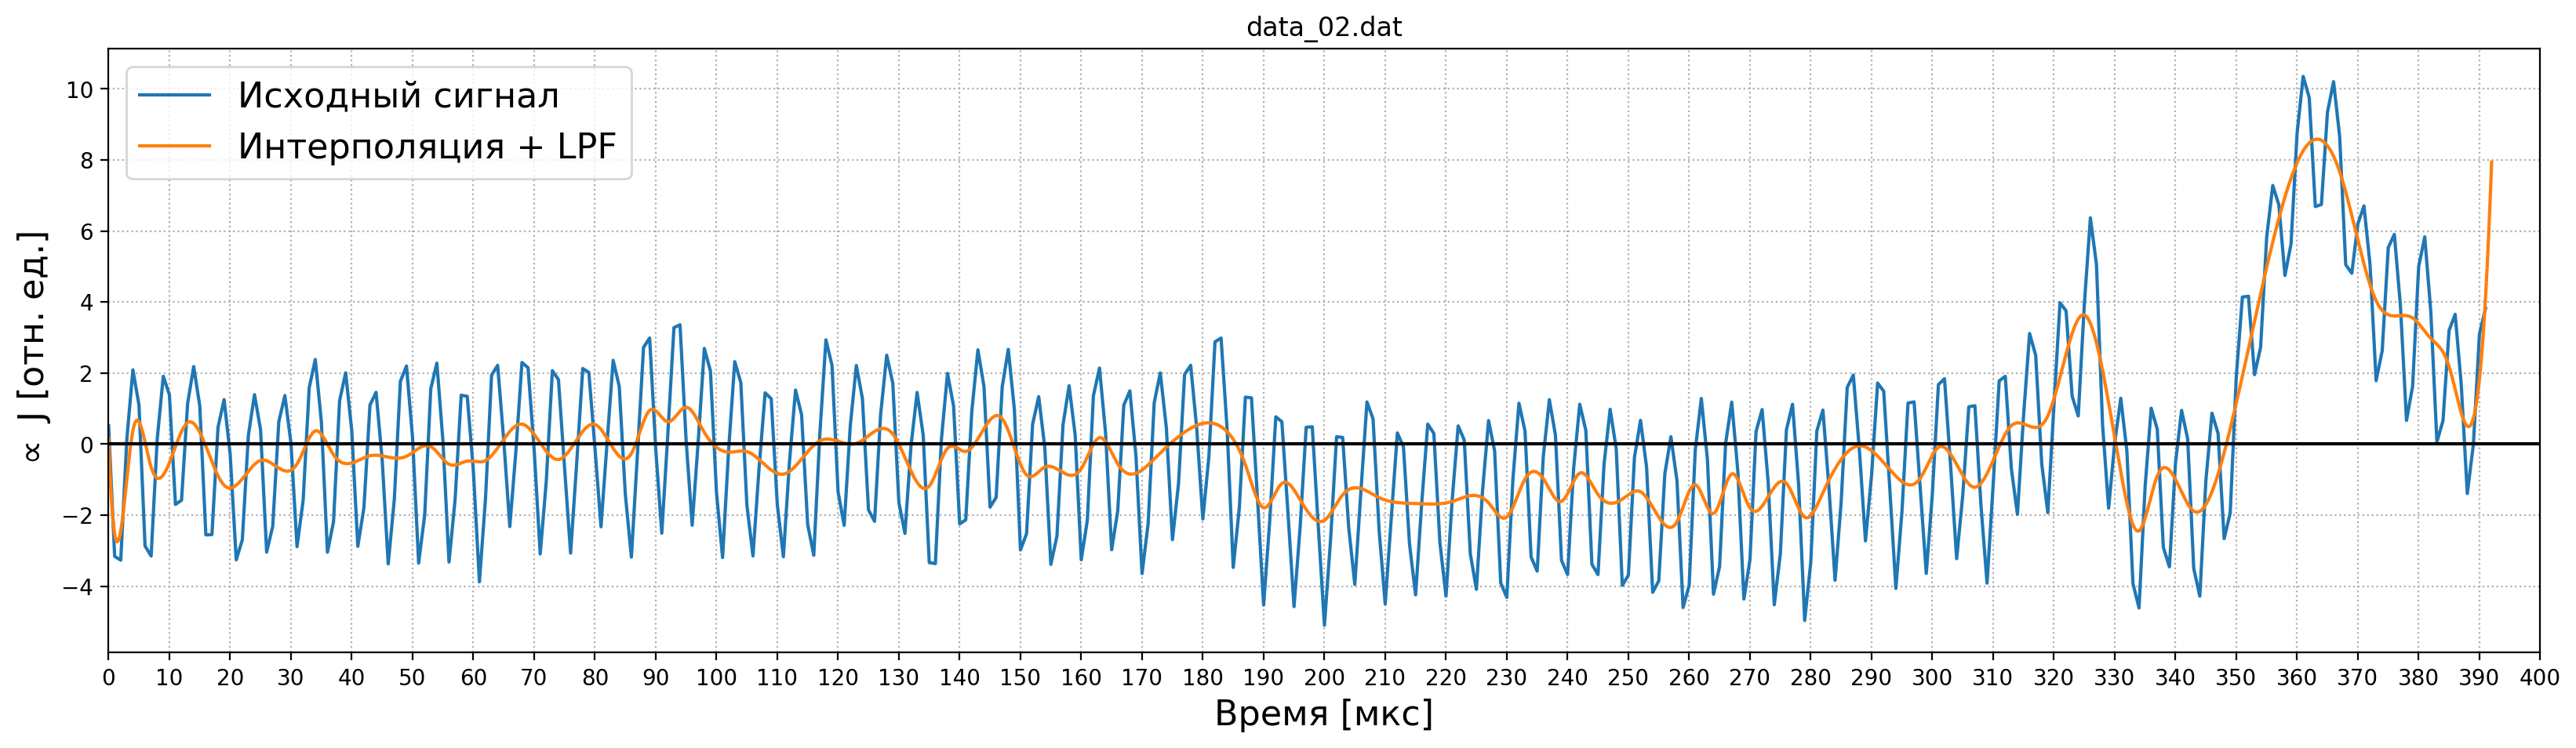

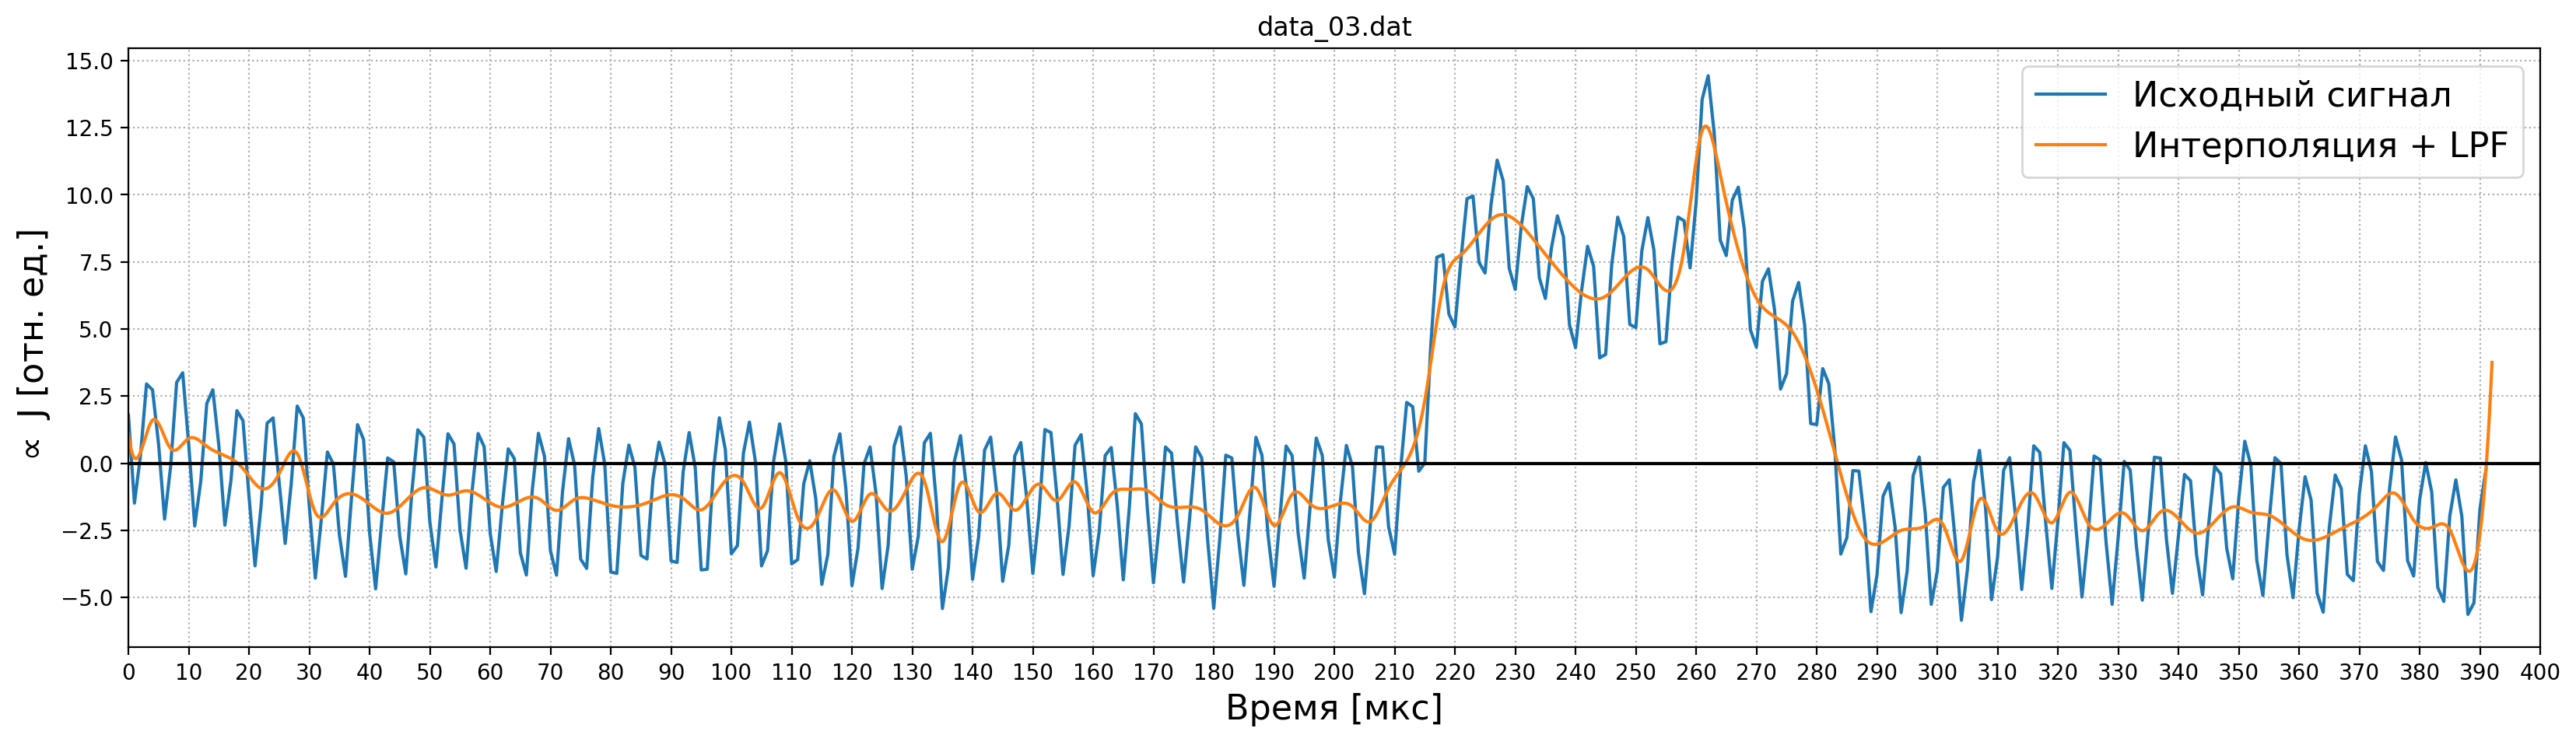

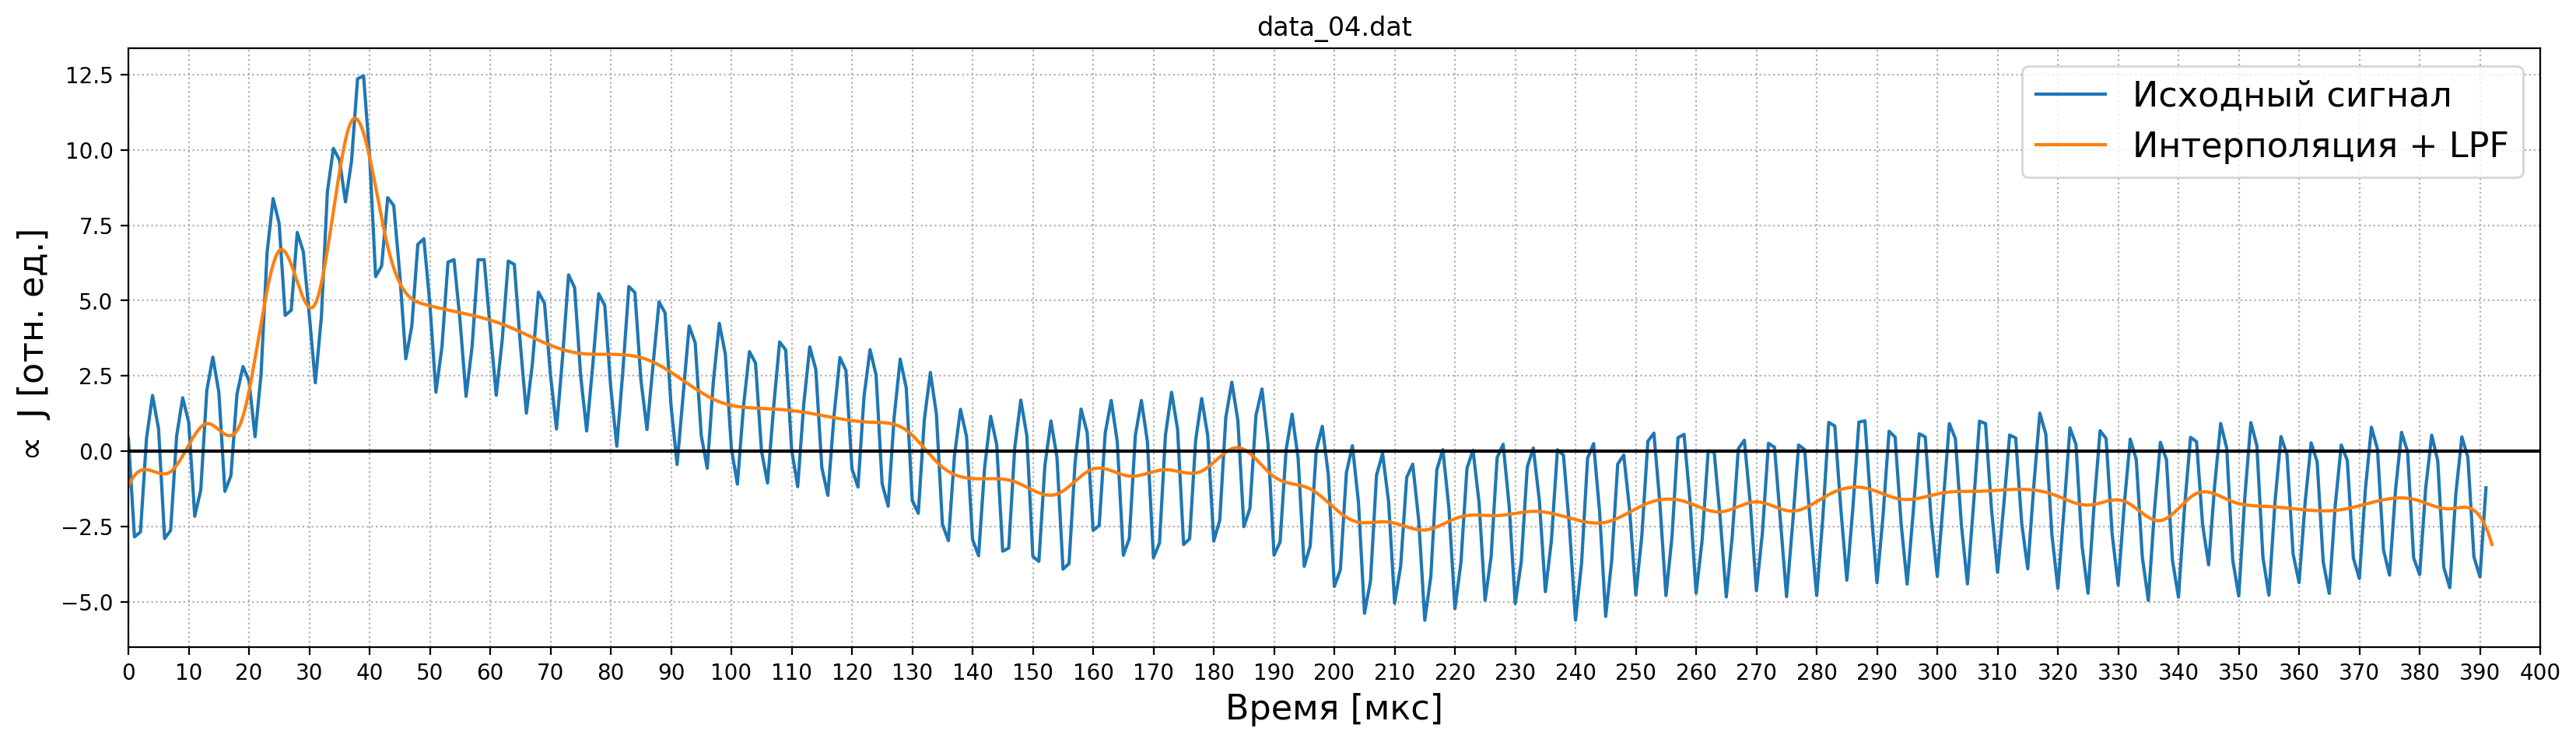

In [68]:
filenames = [f'data_0{i}.dat' for i in range(5)]

for file in filenames:
    data = np.abs(np.loadtxt(file))
    data -= np.mean(data)
    plt.figure(figsize = (20, 5), dpi = 200)
    plt.title(file)
    
    time = np.arange(len(data)) 
    time_slewed = np.linspace(0, len(data), int(1e5))
    interpolation = interpolate.UnivariateSpline(time, data, s = 1e2 * 14)
    plt.plot(time, data, label = 'Исходный сигнал')
    plt.plot(time_slewed, interpolation(time_slewed), label = 'Интерполяция + LPF')
    plt.xlabel("Время [мкс]", fontsize = 16)
    plt.ylabel("$\propto$ J [отн. ед.]", fontsize = 16)
    plt.legend(fontsize = 16)
    plt.axhline(0, color = 'black')
    plt.xticks(np.arange(0, 410, 10))
    plt.xlim(0, 400)
    plt.grid(ls = ':')

    